# Task 1 #
## 1 ##

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('train.csv')
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

X = df.drop('Survived', axis=1)
y = df['Survived']

print("Data preprocessing complete!")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("\nProcessed features:")
print(X.head())

Data preprocessing complete!
Features (X) shape: (891, 8)
Target (y) shape: (891,)

Processed features:
   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0       3  22.0      1      0   7.2500      True       False        True
1       1  38.0      1      0  71.2833     False       False       False
2       3  26.0      0      0   7.9250     False       False        True
3       1  35.0      1      0  53.1000     False       False        True
4       3  35.0      0      0   8.0500      True       False        True


## 2 ##

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5}


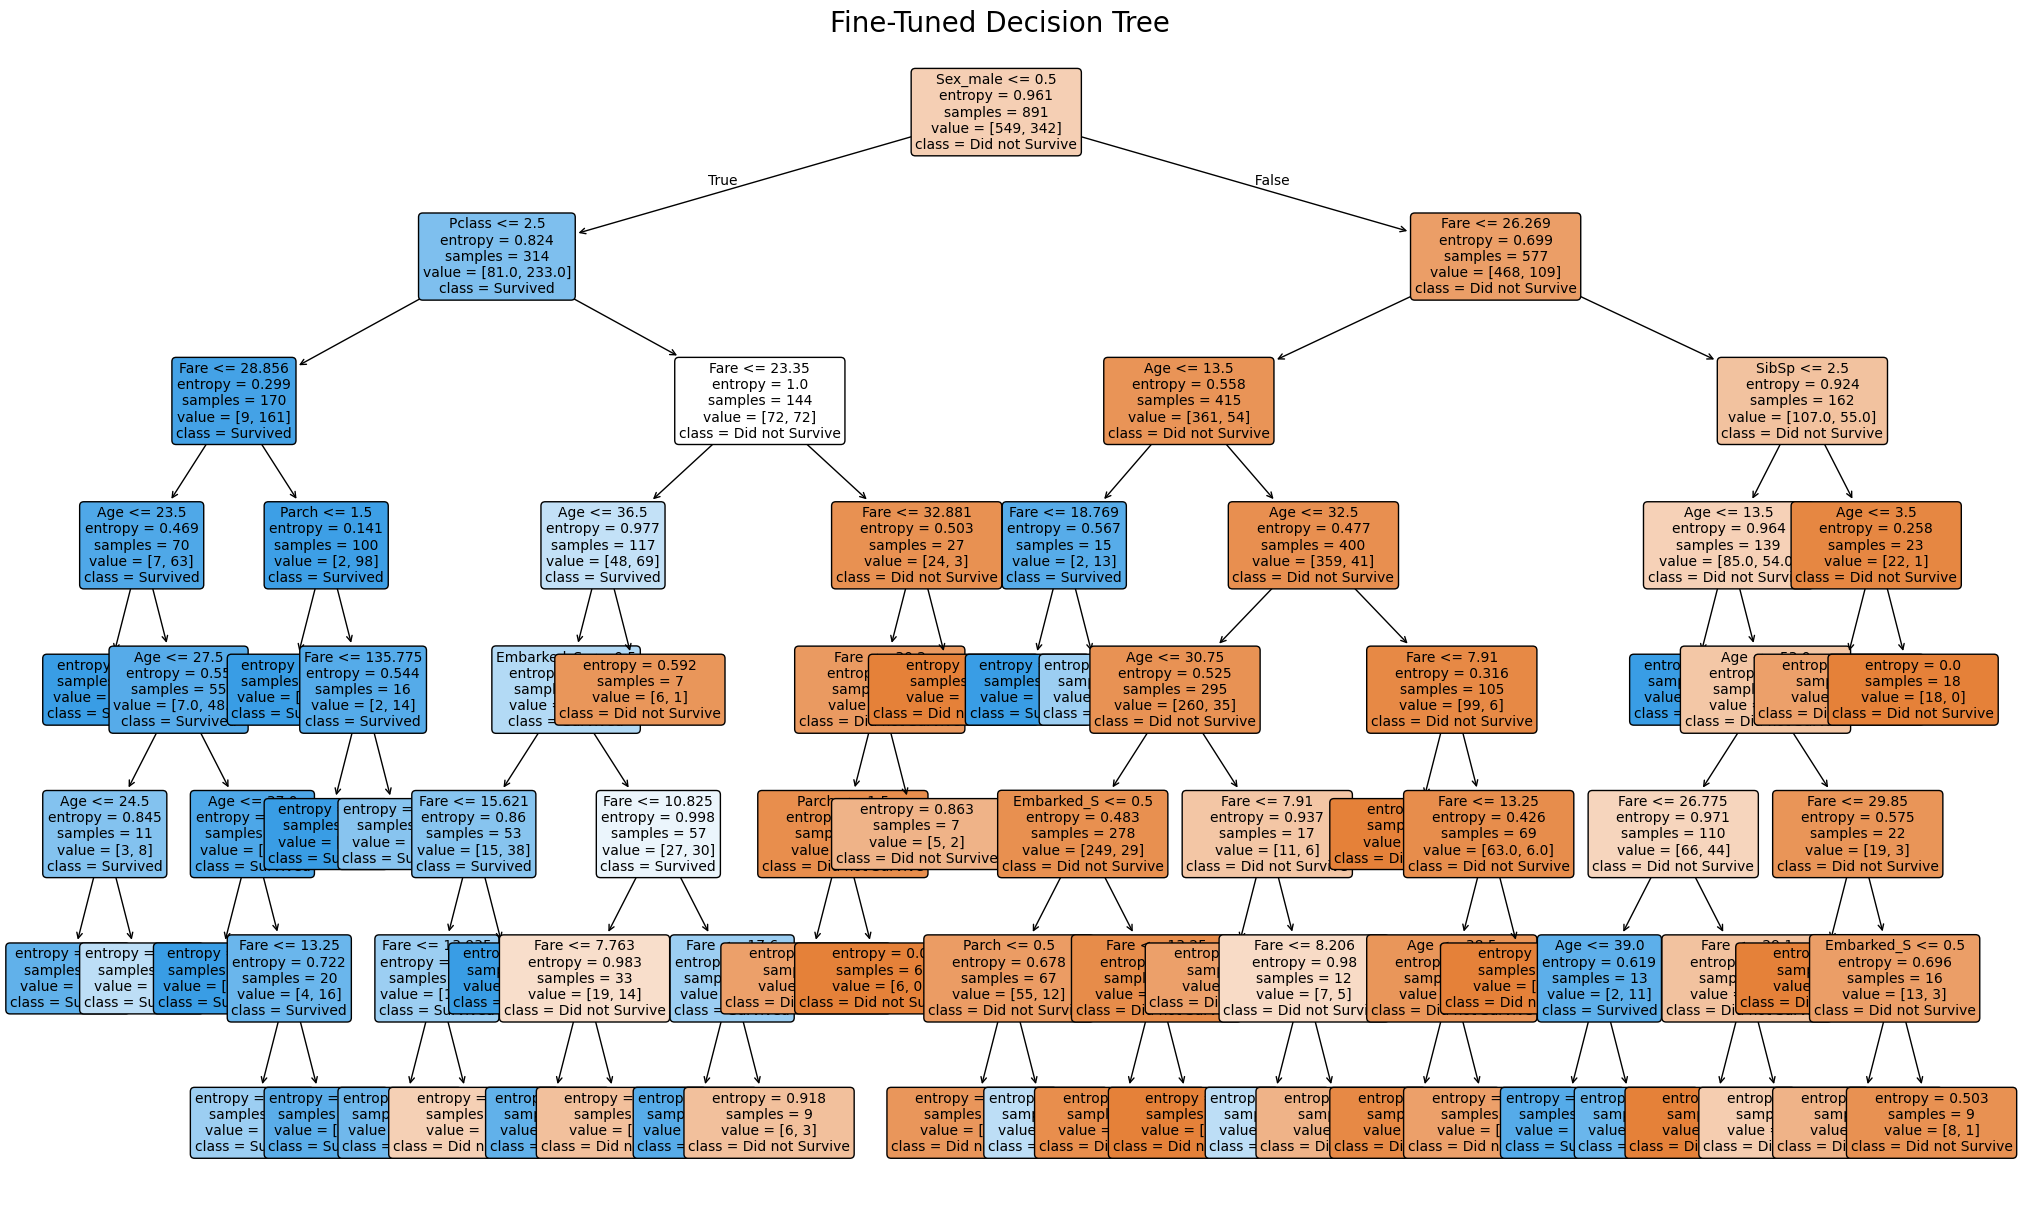

In [3]:
# --- Decision Tree ---

dt_param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X, y)
best_dt = dt_grid_search.best_estimator_

print(f"Best Decision Tree Parameters: {dt_grid_search.best_params_}")

plt.figure(figsize=(25, 15))
plot_tree(best_dt, 
          feature_names=X.columns.tolist(), 
          class_names=['Did not Survive', 'Survived'], 
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("Fine-Tuned Decision Tree", fontsize=20)
plt.show()

## 3 ##

In [4]:
dt_cv_scores = cross_val_score(best_dt, X, y, cv=5, scoring='accuracy')

print("\n--- Decision Tree Evaluation ---")
print(f"Scores for each of the 5 folds: {dt_cv_scores}")
print(f"Average 5-Fold CV Accuracy (Decision Tree): {np.mean(dt_cv_scores):.4f}")


--- Decision Tree Evaluation ---
Scores for each of the 5 folds: [0.81564246 0.81460674 0.85955056 0.80337079 0.83707865]
Average 5-Fold CV Accuracy (Decision Tree): 0.8260


## 4 ##

In [5]:
# --- Random Forest ---

rf_param_grid = {
    'n_estimators': [100, 200],     
    'max_depth': [5, 10, None],      
    'min_samples_leaf': [1, 2, 4]  
}

rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X, y)

best_rf = rf_grid_search.best_estimator_

print(f"\nBest Random Forest Parameters: {rf_grid_search.best_params_}")

rf_cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy')

print("\n--- Random Forest Evaluation ---")
print(f"Scores for each of the 5 folds: {rf_cv_scores}")
print(f"Average 5-Fold CV Accuracy (Random Forest): {np.mean(rf_cv_scores):.4f}")


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}

--- Random Forest Evaluation ---
Scores for each of the 5 folds: [0.80446927 0.81460674 0.87640449 0.81460674 0.85393258]
Average 5-Fold CV Accuracy (Random Forest): 0.8328


# Task 6 #

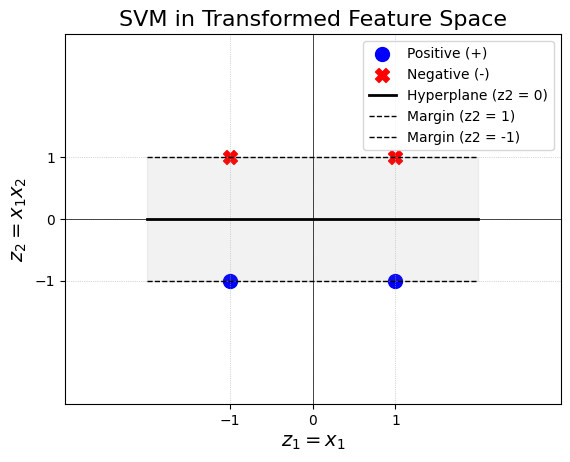

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = {
    'z1': [-1, -1, 1, 1],
    'z2': [1, -1, -1, 1],
    'label': ['Negative (-)', 'Positive (+)', 'Positive (+)', 'Negative (-)']
}
df = pd.DataFrame(data)

positive_points = df[df['label'] == 'Positive (+)']
negative_points = df[df['label'] == 'Negative (-)']

plt.scatter(positive_points['z1'], positive_points['z2'], color='blue', marker='o', s=100, label='Positive (+)')
plt.scatter(negative_points['z1'], negative_points['z2'], color='red', marker='X', s=100, label='Negative (-)')

z1_line = np.linspace(-2, 2, 100)
plt.plot(z1_line, np.zeros(z1_line.shape), 'k-', lw=2, label='Hyperplane (z2 = 0)')

plt.plot(z1_line, np.ones(z1_line.shape), 'k--', lw=1, label='Margin (z2 = 1)')
plt.plot(z1_line, -np.ones(z1_line.shape), 'k--', lw=1, label='Margin (z2 = -1)')

plt.fill_between(z1_line, -1, 1, color='gray', alpha=0.1)

plt.xlabel('$z_1 = x_1$', fontsize=14)
plt.ylabel('$z_2 = x_1 x_2$', fontsize=14)
plt.title('SVM in Transformed Feature Space', fontsize=16)

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.legend(loc='upper right')